In [10]:
import tensorflow as tf
from PIL import Image
%matplotlib inline

In [13]:
#load the tf record into the interator
record_iterator = tf.python_io.tf_record_iterator(path='/Users/sht30795/Desktop/Tips:Cue:CV/data_utilities-master/xview_train_t1.record')


#loop therough the record iterator, extract what features you want
for string_record in record_iterator:
    example = tf.train.Example()
    example.ParseFromString(string_record)
    height = (example.features.feature['image/height'].int64_list.value[0])
    width = (example.features.feature['image/width'].int64_list.value[0])
    img_string = (example.features.feature['image/encoded'].bytes_list.value[0])
    xmin = (example.features.feature['image/object/bbox/xmin'].float_list.value) #this needs to be kept as a list.... each value is the coordinates for each bounding box
    ymin = (example.features.feature['image/object/bbox/ymin'].float_list.value) #this needs to be kept as a list.... each value is the coordinates for each bounding box
    xmax = (example.features.feature['image/object/bbox/xmax'].float_list.value) #this needs to be kept as a list.... each value is the coordinates for each bounding box
    ymax = (example.features.feature['image/object/bbox/ymax'].float_list.value) #this needs to be kept as a list.... each value is the coordinates for each bounding box
    class_label =(example.features.feature['image/object/class/label'].int64_list.value) #this needs to be kept as a list... each is the label for each bounding box inside the image
    break #this makes it so I only extract 1 chip

In [3]:
image = tf.image.decode_image(img_string,channels=3) # RBG
image = tf.image.resize_image_with_crop_or_pad(image,target_height=height,target_width=width)

In [7]:
sess = tf.InteractiveSession()
image_array = image.eval() # this gets an array of the image. Evaluate turns a TF tensor into a numpy array
sess.close()

In [8]:
img = Image.fromarray(image_array, 'RGB')

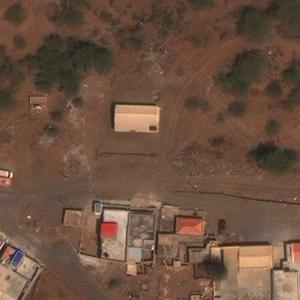

In [12]:
img #display the image